In [9]:
#read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
churnData = pd.read_csv("Customer-Churn.csv")

In [11]:
churnData.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
3005,Female,1,No,No,24,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,20.30,459.95,No
4780,Male,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,70.05,657.5,No
3413,Female,0,Yes,Yes,29,Yes,No,No,No,No,Yes,Yes,Month-to-month,87.80,2621.75,No
3288,Female,0,Yes,Yes,13,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.85,272.35,No
1931,Female,0,Yes,No,53,Yes,No,Yes,Yes,Yes,Yes,Yes,One year,111.80,5809.75,No
5514,Female,0,No,No,1,Yes,Yes,No,No,No,No,No,Month-to-month,48.45,48.45,No
5096,Male,0,Yes,Yes,71,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,86.85,6263.8,No
4656,Female,0,Yes,Yes,22,Yes,No,No,No,No,No,No,Month-to-month,75.80,1615.1,No
4117,Male,0,Yes,No,63,Yes,Yes,No,Yes,No,Yes,Yes,Two year,99.70,6330.4,No
6896,Female,0,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,43.95,43.95,Yes


In [13]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
#convert totalcharges to numeric
churnData["TotalCharges"] = pd.to_numeric(churnData.TotalCharges, errors='coerce')

In [17]:
#checking for null values in the dataframe
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [19]:
#replace the null values in totalCharges with 0
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(0)

In [21]:
#Select the features and the target
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [23]:
#scaling the features using normalizer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
#performing a train,test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [27]:
#using logistic regression model for training the data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
#checking the accuracy of the test data
model.score(X_test, y_test)

0.7970191625266146

In [33]:
# Predict the test data
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model on testing data:", accuracy)

Accuracy of the model on testing data: 0.7970191625266146


In [37]:
#checking for imbalance
y.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

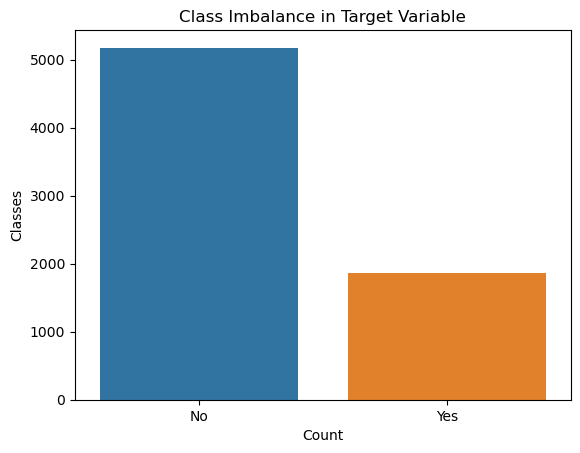

In [39]:
# Horizontal bar chart for class imbalance
ax = sns.countplot(x=y)
plt.title("Class Imbalance in Target Variable")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [43]:
#concatenate the X and y train dataset as oversampling or undersampling should only be done on the training dataset
X_train = pd.DataFrame(X_train)  # Convert back to DataFrame
y_train = pd.Series(y_train, name="target") # Convert to Series and give it a name
train = pd.concat([X_train, y_train], axis=1)
display(train.shape)
train.head()

(6753, 5)

,0,1,2,3,target
0,-0.829521,-0.439916,-1.497668,-0.891800,No
1,0.392090,-0.439916,0.303720,0.388601,No
2,1.572981,-0.439916,0.012906,1.059728,Yes
3,1.572981,-0.439916,0.687595,1.774048,No
4,-0.096554,-0.439916,0.187394,-0.103671,NaN


#Performing Upsampling

In [46]:
from sklearn.utils import resample
 # seperate majority and the minority class
Churn_No = churnData[churnData.Churn=="No"]
Churn_Yes = churnData[churnData.Churn=="Yes"]

In [48]:
print(Churn_No.shape)
print(Churn_Yes.shape)

(5174, 16)
(1869, 16)


In [50]:
Churn_Yes_upsampled = resample(Churn_Yes,
                          replace=True, # sample with replacement
                          n_samples=len(Churn_No), # match number in majority class
                          random_state=27) # reproducible results

In [52]:
print(Churn_No.shape)
print(Churn_Yes_upsampled.shape)

(5174, 16)
(5174, 16)


In [54]:
#combine the upsampled Yes data to the No data
train_upsampled = pd.concat([Churn_No, Churn_Yes_upsampled])
train_upsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,No
7,Female,0,No,No,10,No,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,Male,1,No,No,15,Yes,No,Yes,No,No,No,No,Month-to-month,74.40,1074.30,Yes
3755,Male,0,No,No,4,Yes,No,No,No,No,No,No,Month-to-month,76.05,318.90,Yes
6039,Male,1,Yes,No,27,No,No,No,No,No,No,Yes,Month-to-month,36.50,1032.00,Yes
1538,Male,0,No,No,8,Yes,No,Yes,No,No,Yes,Yes,Month-to-month,100.85,819.55,Yes


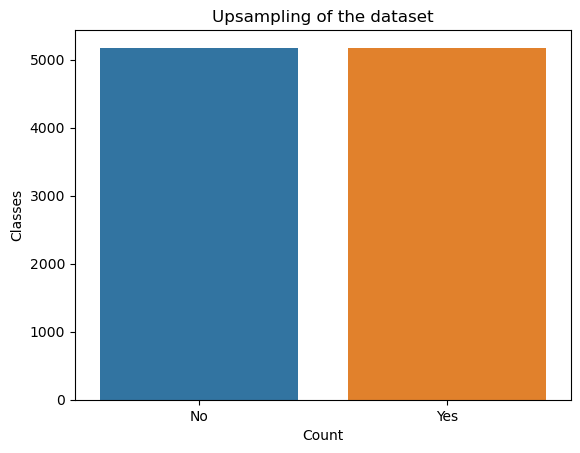

In [56]:
# Horizontal bar chart for the upsaled data
y_upsampled = train_upsampled["Churn"]
sns.countplot(x=y_upsampled)
plt.title("Upsampling of the dataset")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [58]:
X_train_upsampled = train_upsampled[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y_train_upsampled = train_upsampled["Churn"]
model_upsampled = LogisticRegression()
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

LogisticRegression()

In [60]:
#check the accuracy of the training data
model_upsampled.score(X_train_upsampled, y_train_upsampled)

0.7306725937379204

In [62]:
#checking the accuracy of the testing data
from sklearn.metrics import accuracy_score
# Ensure X_test is a DataFrame and has the necessary columns
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"])

# Predict the test data
y_pred_upsampled = model_upsampled.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_upsampled)
print("Accuracy of the model on testing data:", accuracy)

Accuracy of the model on testing data: 0.730305180979418


#Performing downsampling

In [65]:
Churn_No_downsampled = resample(Churn_No,
                          replace=True, # sample with replacement
                          n_samples=len(Churn_Yes), # match number in majority class
                          random_state=27) # reproducible results

In [67]:
print(Churn_No_downsampled.shape)
print(Churn_Yes.shape)

(1869, 16)
(1869, 16)


In [69]:
#combine the downsampled No data to the Yes data
train_downsampled = pd.concat([Churn_No_downsampled, Churn_Yes])
train_downsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
6994,Female,0,Yes,Yes,43,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,24.45,993.15,No
5109,Male,0,Yes,Yes,66,Yes,Yes,Yes,Yes,Yes,No,No,Two year,65.85,4097.05,No
5298,Female,1,Yes,No,60,Yes,No,Yes,Yes,No,Yes,Yes,Month-to-month,105.90,6401.25,No
6589,Female,0,Yes,No,68,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.80,1911.50,No
5760,Male,1,Yes,No,16,Yes,No,No,Yes,Yes,No,Yes,Month-to-month,91.55,1540.05,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,No,No,Yes,Yes,No,One year,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,No,No,No,No,No,Month-to-month,44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,No,No,No,No,No,No,Month-to-month,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Yes,Yes,No,Yes,No,Month-to-month,102.95,6886.25,Yes


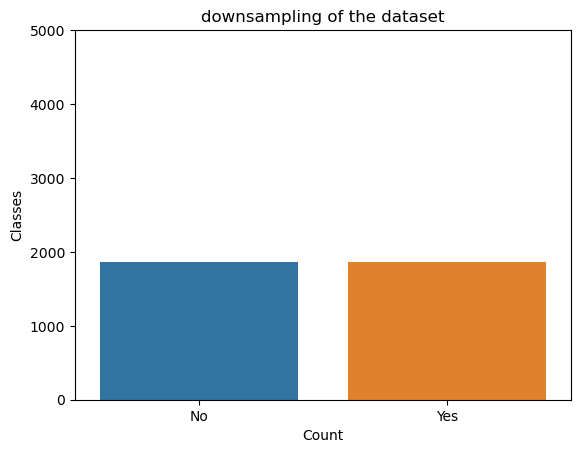

In [71]:
#plot hoizontal bar for the downsampled data
y_downsampled = train_downsampled["Churn"]
sns.countplot(x=y_downsampled)
plt.title("downsampling of the dataset")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.yticks(np.arange(0, 5001, 1000))
plt.show()

In [73]:
X_train_downsampled = train_downsampled[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y_train_downsampled = train_downsampled["Churn"]
model_downsampled = LogisticRegression()
model_downsampled.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression()

In [75]:
#check the accuracy of the downsampled training data
model_downsampled.score(X_train_downsampled, y_train_downsampled)

0.7225789192081327

In [77]:
#checking the accuracy of the downsampled testing data
from sklearn.metrics import accuracy_score
# Ensure X_test is a DataFrame and has the necessary columns
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test, columns=["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"])

# Predict the test data
y_pred_downsampled = model_downsampled.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_downsampled)
print("Accuracy of the model on testing data:", accuracy)

Accuracy of the model on testing data: 0.730305180979418


In [79]:
##For this particular excercise, neither Upsampling or downsampling improved the model score or accuracy.